In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://drive.google.com/drive/u/0/folders/13hjV3LEGjfG3_u1wUzkhM2S6rNy4jLfa/Housing.csv'

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

# Display the first 5 rows of the DataFrame
#print(df.head())

In [39]:
from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [40]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


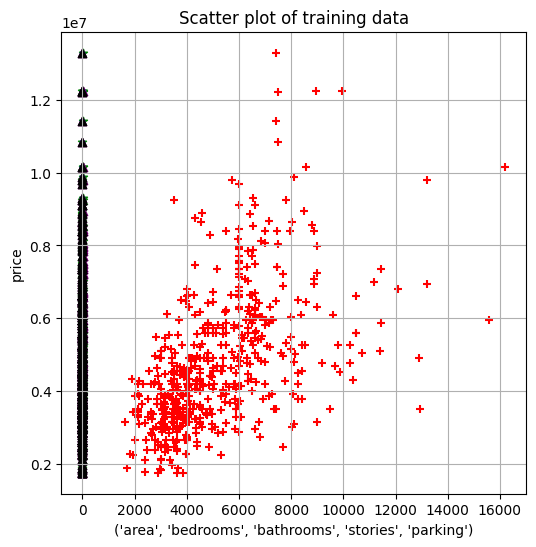

In [188]:
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#print(df.columns[1])
X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 0]  # get output values from the second column --  Y is a list here which is a 2 dimentional array
X_3 = df.values[:, 1:5]
X_1 = df.values[:, 10].reshape(545, 1)
#print(X_1)
X_3 = np.hstack((X_3, X_1))
#print(X_3[:10,3])
# Scatter plot
#X_3[:,0] = X_3[:,0]/1000
#X_3[:,1] = X_3[:,1]*2.6
#X_3[:,2] = X_3[:,2]*4
#X_3[:,3] = X_3[:,3]*4
#X_3[:,4] = X_3[:,4]*5.5 + 2
plt.scatter(X_3[:,0], y, color='red',   marker='+')
plt.scatter(X_3[:,1], y, color='green', marker='*')
plt.scatter(X_3[:,2], y, color='blue',  marker= '.')
plt.scatter(X_3[:,3], y, color='purple',marker= '^')
plt.scatter(X_3[:,4], y, color='black', marker= '^')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel(('area', 'bedrooms', 'bathrooms', 'stories', 'parking'))
plt.ylabel(df.columns[0])
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [194]:
X_0 = np.ones((545, 1))
X = np.hstack((X_0, X_3))
theta = np.zeros(6)
iterations = 5;
alpha = .01;

In [81]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    cost_history = np.zeros(iterations)
    i = 0
    while i < iterations:
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        i += 1
    return theta, cost_history

In [195]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, and theta_4 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, and theta_4 = 16383645455824.084


In [196]:
#iterations = 1500;
#alpha = 0.01;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [1.2792460328725908e+27 7.756369830753322e+30 3.8534416048301607e+27
 1.6978116504927594e+27 2.3488873729347062e+27 1.0508784892912276e+27]


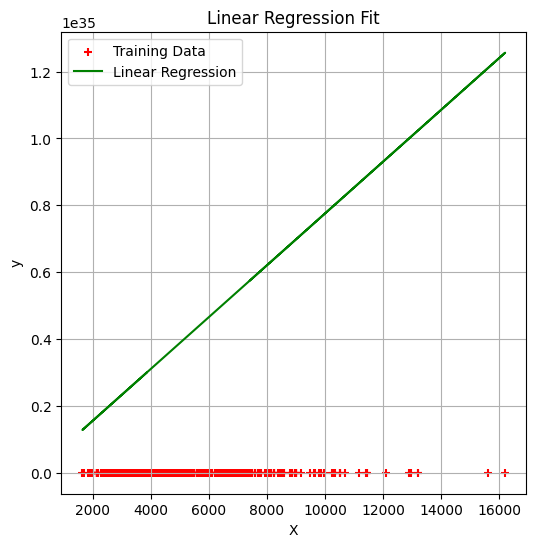

In [197]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
#plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

Validating

In [204]:
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)
#X = X[:,1]
#print(X)
# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

In [202]:
# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 50
m = len(X_train)

In [205]:
# initial values
theta = np.random.randn(2,1) #np.zeros(7)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []
iteration = 0
while iteration < n_iterations:
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = np.subtract(theta ,learning_rate * gradients)

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    iteration += 1

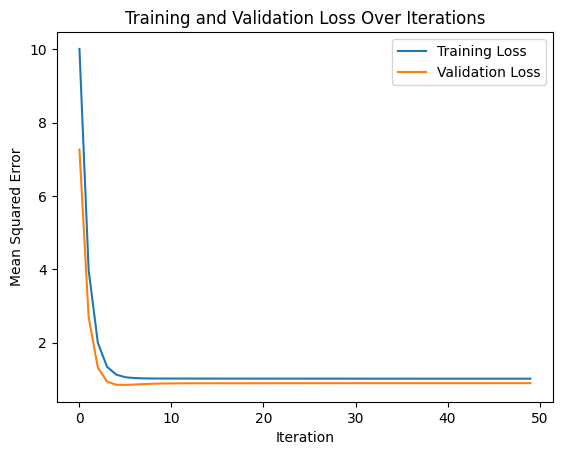

In [ ]:
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

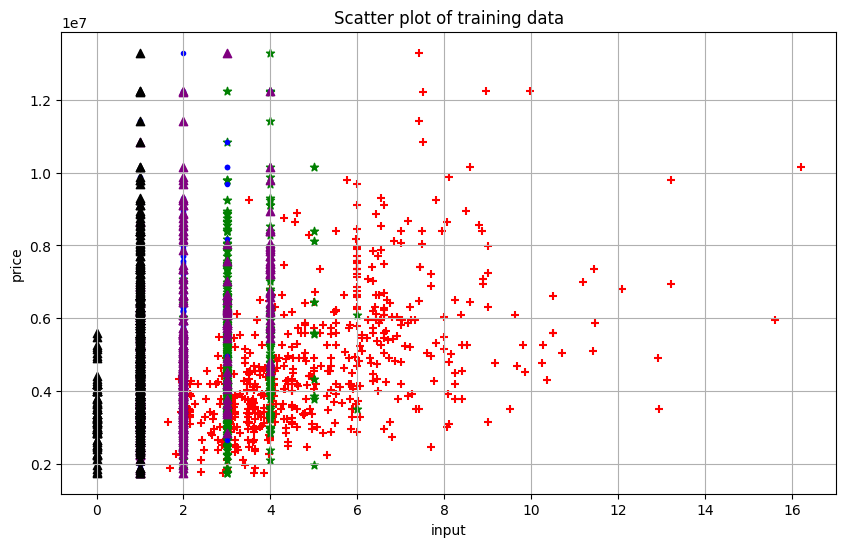

In [137]:
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

#print(df.columns[1])
X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 0]  # get output values from the second column --  Y is a list here which is a 2 dimentional array
X_3 = df.values[:, 1:11]

# Scatter plot

X_3[:,0] = X_3[:,0]/1000
'''
X_3[:,1] = X_3[:,1]*2.6
X_3[:,2] = X_3[:,2]*4
X_3[:,3] = X_3[:,3]*4
X_3[:,4] = X_3[:,4]*5.5 + 2
'''
plt.scatter(X_3[:,0], y, color='red',   marker='+')
plt.scatter(X_3[:,1], y, color='green', marker='*')
plt.scatter(X_3[:,2], y, color='blue',  marker= '.')
plt.scatter(X_3[:,3], y, color='purple',marker= '^')
plt.scatter(X_3[:,4], y, color='black', marker= '^')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('input')
plt.ylabel(df.columns[0])
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [139]:
X_0 = np.ones((545, 1))
X = np.hstack((X_0, X_3))
theta = np.zeros(11)
iterations = 2000;
alpha = .01;

#iterations = 1500;
#alpha = 0.01;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [-172984.69196632865 267142.10611433 96501.06052349054 976744.273585536
 477861.2007532897 476331.4712474972 363688.97962315683 500283.82095001475
 526520.1360437634 875653.5840614812 312531.0342990025]


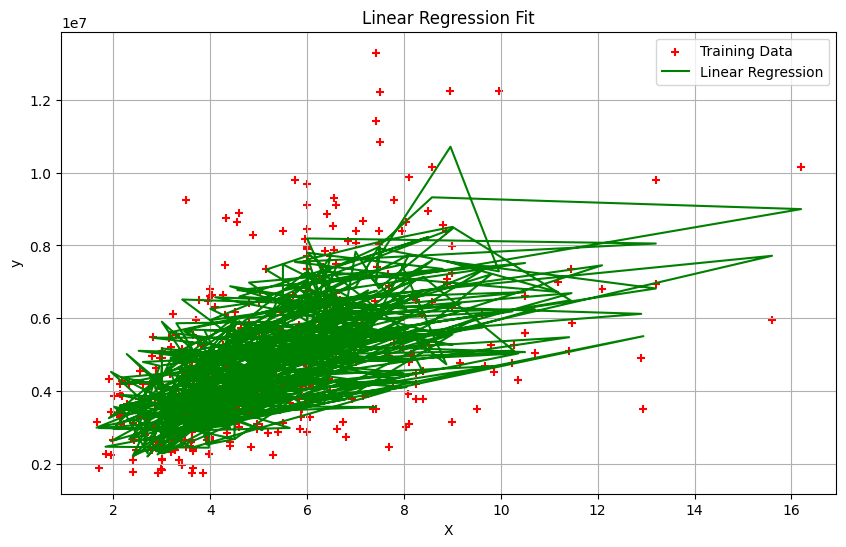

In [141]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

In [ ]:
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

In [ ]:
# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 50
m = len(X_train)

In [ ]:
# initial values
theta = np.random.randn(2,1) #np.zeros(7)
#theta = theta.astype('float32')
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

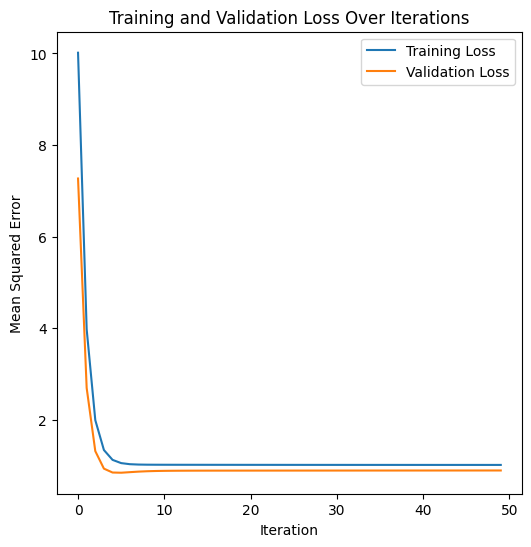

In [ ]:
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 2

Normalization

In [206]:
from sklearn import preprocessing
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_3 = df.values[:, 1:5]
X_1 = df.values[:, 10].reshape(545, 1)
X = np.hstack((X_3, X_1))
size = 5
y = df.values[:, 0]
min = np.zeros(size)
max = np.zeros(size)

i = 0
while i < size:
  max[i] = X[:,i].max()
  min[i] = X[:,i].min()
  i += 1

j = 0
while j < size:
  range = (max[j] - min[j])
  #u = X[:,j].sum()

  i = 0
  while i < 545:
    X[i,j] = (X[i,j] - min[j]) / range
    i += 1
  j += 1

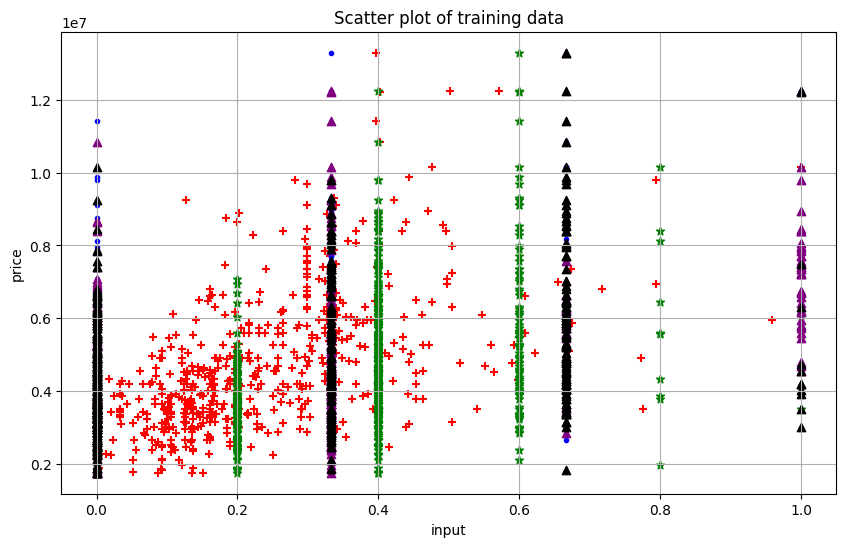

In [176]:
plt.scatter(X[:,0], y, color='red',   marker='+')
plt.scatter(X[:,1], y, color='green', marker='*')
plt.scatter(X[:,2], y, color='blue',  marker= '.')
plt.scatter(X[:,3], y, color='purple',marker= '^')
plt.scatter(X[:,4], y, color='black', marker= '^')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('input')
plt.ylabel(df.columns[0])
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [179]:
X_0 = np.ones((545, 1))
Xs = np.hstack((X_0, X))
theta = np.zeros(6)
iterations = 1000;
alpha = .01;

#iterations = 1500;
#alpha = 0.01;

theta, cost_history = gradient_descent(Xs, y, theta, alpha, iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [2875456.104370269 1793975.0350744005 1480384.6010472022 1356542.874922475
 1627785.2610686256 1493141.1760534488]


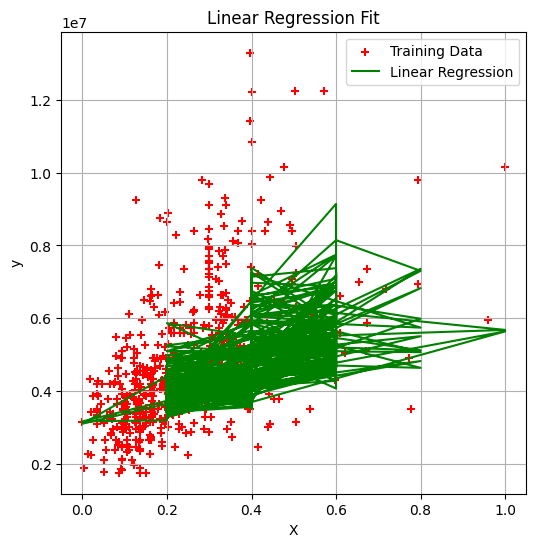

In [180]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(Xs[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],Xs.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

Normalizing the output

In [131]:
ys = Xs.dot(theta)
min = ys.min()
max = ys.max()
range = max - min

i = 0
while i < 545:
  ys[i] = (ys[i] - min) / range
  i += 1


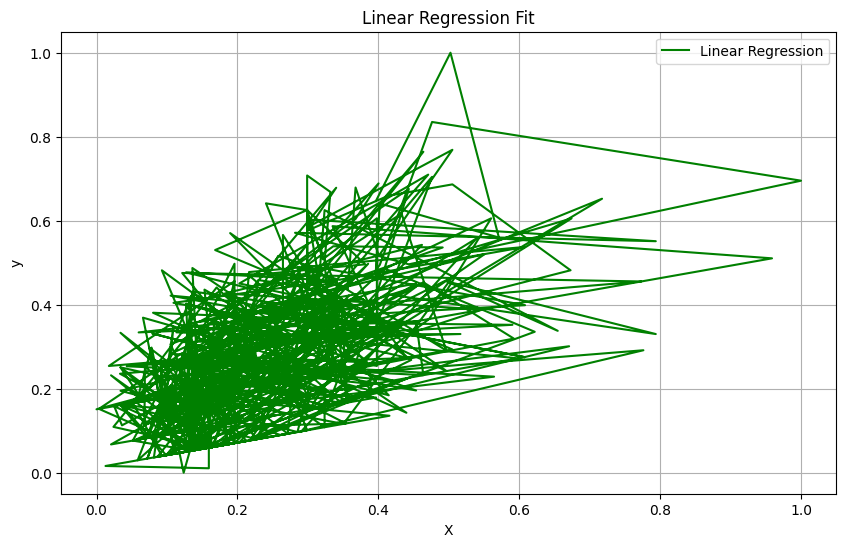

In [185]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
#plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(Xs[:,1],ys, color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

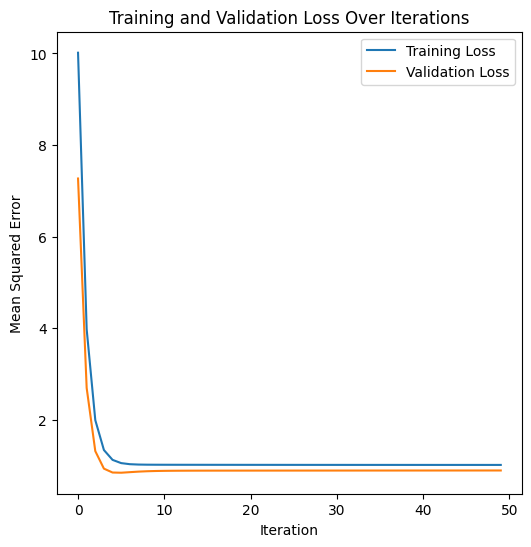

In [74]:
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 50
m = len(X_train)

# initial values
theta = np.random.randn(2,1) #np.zeros(7)
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []
iteration = 0
while iteration < (n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    iteration += 1
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Standardization

In [207]:
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_3 = df.values[:, 1:5]
X_1 = df.values[:, 10].reshape(545, 1)
XN = np.hstack((X_3, X_1))
size = 5
y = df.values[:, 0]
col = 0
while col < size:
  dataset = XN[:, col]
  #print(dataset)
  n = len(dataset)
  mean_ans = 0
  ans = 0
  j = dataset.sum()

  for i in dataset:
      ans = ans + (i*i)

  #print('n : ', n)
  #print("Summation (X)   : ", j)
  #print("Summation (X^2) : ", ans)

  # Calculating Standard Deviation
  part_1 = ans/n
  part_2 = mean_ans*mean_ans   #attention
  #print(mean_ans)
  standard_deviation = part_1 - part_2
  #print("Standard Deviation : ", standard_deviation)

  # Calculating Mean
  mean = j/n
  #print('mean : ', mean)

  # Calculating the Z-Score for each
  final_z_score = []
  #print("Calculating Z-Score of Each Value in dataset_1")
  for i in dataset:
      z_score = (i-mean)/standard_deviation
      final_z_score.append(z_score)

  XN[:, col] = final_z_score
  col += 1
  # Comparing the Values of Original Dataset and Saled Down Dataset

  #print("\nOriginal DataSet   |               Z-Score ")
  #print()
  i = 0
  while i < 0:
      print("    ", dataset[i], "          |     ", final_z_score[i])
      i += 1

dataset_0 = y#XN[:, 0] #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]


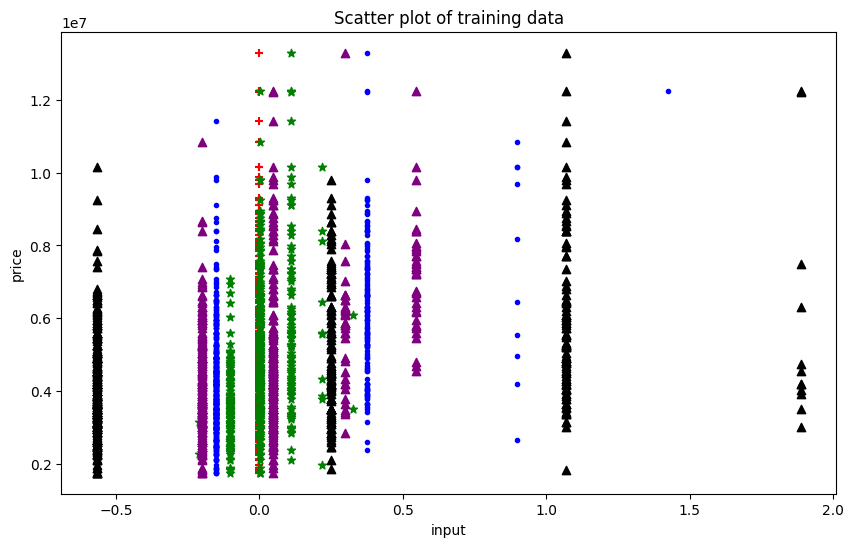

In [113]:
plt.scatter(XN[:,0], y, color='red',   marker='+')
plt.scatter(XN[:,1], y, color='green', marker='*')
plt.scatter(XN[:,2], y, color='blue',  marker= '.')
plt.scatter(XN[:,3], y, color='purple',marker= '^')
plt.scatter(XN[:,4], y, color='black', marker= '^')

# Grid, labels, and title
#plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('input')
plt.ylabel(df.columns[0])
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [114]:
X_0 = np.ones((545, 1))
Xs = np.hstack((X_0, XN))
theta = np.zeros(6)
iterations = 1000;
alpha = .01;

#iterations = 1500;
#alpha = 0.01;

theta, cost_history = gradient_descent(Xs, y, theta, alpha, iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [4766712.829535106 637.4323129473079 412163.85965162865 1750354.8718553393
 1340810.8261214602 891531.9085535036]


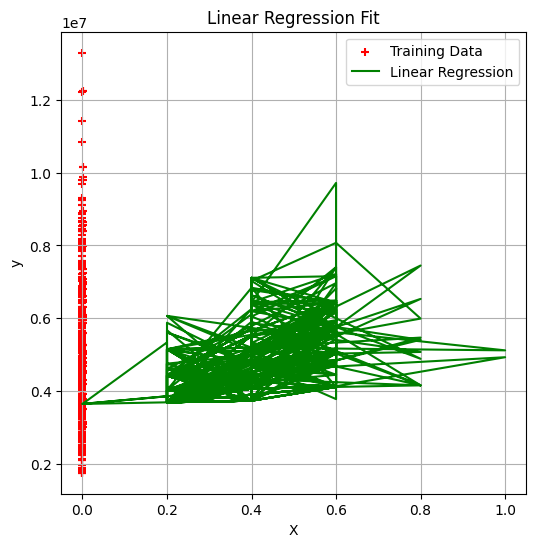

In [115]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(Xs[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],Xs.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

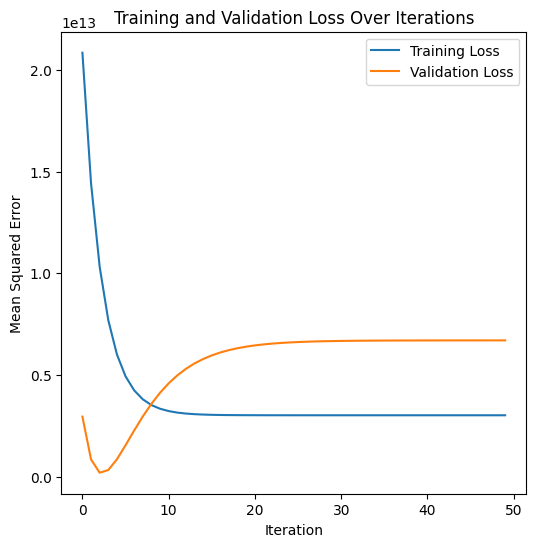

In [78]:
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)
X = XN[:,0]
# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 50
m = len(X_train)

# initial values
theta = np.zeros(2)#np.random.randn(2,1)#np.zeros(11)
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []
iteration = 0
while iteration < (n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = np.subtract(theta, learning_rate * gradients)

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    iteration += 1

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()